![](https://miro.medium.com/max/2727/1*FHQOSHMMT07CbXpklk1Ehw.jpeg)

![](http://prisoft.com/wp-content/uploads/2018/11/8.png)

In [1]:
from numpy import loadtxt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.calibration import calibration_curve
from scipy.sparse import vstack
from sklearn.model_selection import learning_from sklearn.model_selection import GridSearchCV
fcurve
rom xgboost import plot_tree
from xgboost import plot_importance
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from tabulate import tabulate
import pickle
import seaborn as sns
import tensorflow as tf
import keras
from collections import Counter
%matplotlib inline
sns.set()

Using TensorFlow backend.


In [4]:
data=pd.read_csv('C:/Users/a0019865/Desktop/Analytics Road Map/Workshops/2019 workshop/SAAIR2019/Machine Learning/datasets/bostonhousing.csv')

In [6]:
data.head()

,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV,MEDV3,MEDV2
0,42.2550,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0,High,1
1,42.2875,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6,High,1
2,42.2830,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7,High,1
3,42.2930,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4,High,1
4,42.2980,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2,High,1


In [7]:
data.describe()

,LAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV,MEDV2
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,42.216440,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.528854,0.484190
std,0.061777,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.182176,0.500245
min,42.030000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000,0.000000
25%,42.180775,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000,0.000000
50%,42.218100,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000,0.000000
75%,42.252250,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000,1.000000
max,42.381000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000,1.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
LAT        506 non-null float64
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
MEDV       506 non-null float64
MEDV3      506 non-null object
MEDV2      506 non-null int64
dtypes: float64(10), int64(4), object(1)
memory usage: 59.4+ KB


In [8]:
X =data.iloc[:,:-3]
y =data['MEDV2']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=10,random_state=42)                          
# Fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
from sklearn import datasets, neural_network, metrics, model_selection, preprocessing

In [15]:
metrics.accuracy_score(y_test, rf.predict(X_test))

0.8823529411764706

In [16]:
y_pred = rf.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[47  6]
 [ 6 43]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.88      0.88      0.88        49

   micro avg       0.88      0.88      0.88       102
   macro avg       0.88      0.88      0.88       102
weighted avg       0.88      0.88      0.88       102

0.8823529411764706


In [18]:
# feature importance
print(rf.feature_importances_)

[0.06764281 0.05853267 0.02687227 0.04487821 0.0130923  0.17479836
 0.26663221 0.12709443 0.06758111 0.01260729 0.07539931 0.06486902]


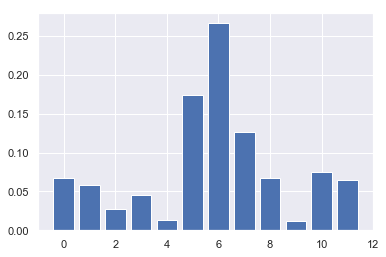

In [20]:
# plot
pyplot.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
pyplot.show()

In [22]:
headers = ["name", "score"]
values = sorted(zip(X.columns, rf.feature_importances_), key=lambda X: X[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

name         score
RM       0.266632
NOX      0.174798
AGE      0.127094
TAX      0.0753993
LAT      0.0676428
DIS      0.0675811
PTRATIO  0.064869
CRIM     0.0585327
INDUS    0.0448782
ZN       0.0268723
CHAS     0.0130923
RAD      0.0126073


In [26]:
importances = rf.feature_importances_

In [27]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

In [28]:
indices = np.argsort(importances)[::-1]

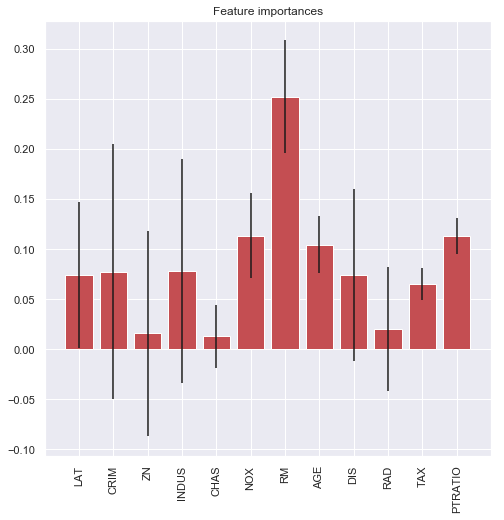

In [34]:
#Plot the feature importances of the forest
plt.figure(figsize=(8,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), rf.feature_importances_,
   color="r", yerr=std[indices], align="center")
feature_names = X.columns
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xticks(rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [39]:
# make predictions for test data
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
print(predictions[:5])

[0, 1, 1, 0, 1]


In [40]:
# predict probabilities
probs = rf.predict_proba(X_test)
# keep the predictions for class 1 only
probs = probs[:, 1]
print(probs*100)

[  8.7  99.4  98.9   0.3  99.   86.3  98.    0.3  13.2  98.7  87.6   1.7
   0.8  86.   84.1  12.9  81.6 100.    5.2   0.3   8.9  75.6  99.9  99.6
  83.5  15.3   0.2   9.1  17.3   9.2  92.   99.6   1.   10.3  18.1  99.4
  87.7   0.    0.   99.7  99.6   7.5  69.9  98.2   3.6  95.    7.2  76.
   0.2   7.8  99.1  93.8   4.3   1.   20.4   0.3   5.6   3.1  99.2   0.6
  15.6  15.6  11.1   7.9  92.2  97.7  97.3  11.9  96.   99.9   2.   96.1
   0.3  99.1  10.4   3.2   3.    3.1  95.8  12.6 100.    0.2  98.7  88.9
  17.7  70.7   0.2  19.9  81.2  98.6   0.   99.8   1.8  94.2  98.8  99.2
   0.8 100.   86.4 100.    9.7   2.9]


In [41]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

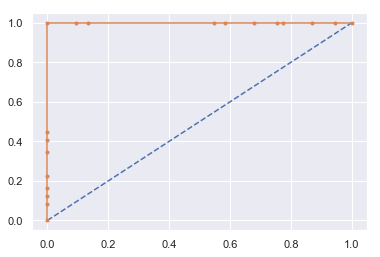

In [42]:
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()